<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [250]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [251]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [253]:
#df["species"] = df["species"].str.lower()
#df["species"] = df["species"].str.strip()
#df["species"] = df["species"].fillna("default")
print(df["species"].value_counts())
print("Especies distintas: ", len(df["species"].unique())-1)


setosa        50
virginica     50
versicolor    49
default        1
Name: species, dtype: int64
Especies distintas:  3


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

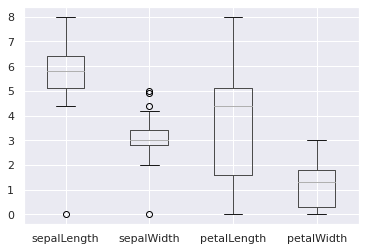

In [254]:
df = df.fillna(0)
boxplot = df.boxplot(column=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'])

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [255]:
inf_sl = df["sepalLength"] >= 4.0
sup_sl = df["sepalLength"] <= 7.0
inf_sw = df["sepalWidth"] >= 2.0
sup_sw = df["sepalWidth"] <= 4.5
inf_pl = df["petalLength"] >= 1.0
sup_pl = df["petalLength"] <= 7.0
inf_pw = df["petalWidth"] >= 0.1
sup_pw = df["petalWidth"] <= 2.5

msl = inf_sl & sup_sl
msw = inf_sw & sup_sw
mpl = inf_pl & sup_pl
mpw = inf_pw & sup_pw

df["label"] = msl & msw & mpl & mpw
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

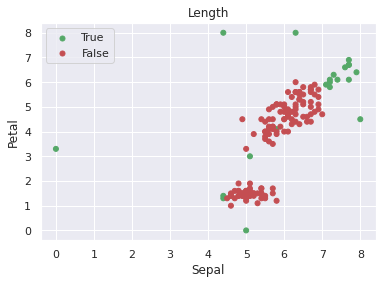

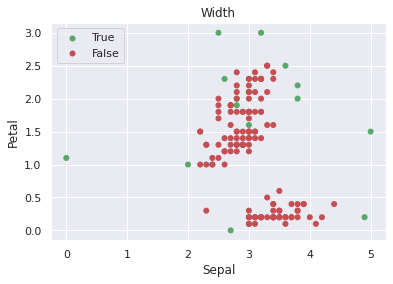

In [256]:
x = df.sepalLength
y = df. petalLength
f = df.label
N = x.shape[0]

area = np.full(N, 25)
area1 = np.ma.masked_where(f==1, area)
area2 = np.ma.masked_where(f!=1, area)

sc1 = plt.scatter(x, y, s=area1, c = "g", label="True" )
sc2 = plt.scatter(x, y, s=area2, c = "r", label="False")

plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.title("Length")
plt.legend(loc='upper left')
plt.show()

#===#

x = df.sepalWidth
y = df. petalWidth
f = df.label
N = x.shape[0]

area = np.full(N, 25)
area1 = np.ma.masked_where(f==1, area)
area2 = np.ma.masked_where(f<1, area)

sc1 = plt.scatter(x, y, s=area1, c = "g", label="True" )
sc2 = plt.scatter(x, y, s=area2, c = "r", label="False")

plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.title("Width")
plt.legend(loc='upper left')
plt.show()


5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

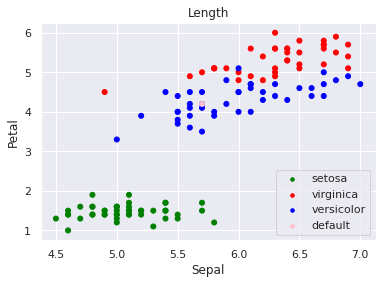

In [257]:
def mask(f, cond, N, tamaño):
  i=0
  mask = np.full(N, 0)
  for e in f:
    if(e == cond):
      mask[i] = tamaño
    i+=1
  return mask

Validos = df["label"] == True
dff = df[Validos]
x = dff.sepalLength
y = dff.petalLength
f = dff["species"]
N = x.shape[0]

#area1 = np.ma.masked_where(f=='setosa', area)
#area2 = np.ma.masked_where(f=='virginica', area)
#area3 = np.ma.masked_where(f=='versicolor', area)
#area4 = np.ma.masked_where(f=='default', area)
#i=6
#print(f[i] == "default")
#print(area4[i])
#No se porque el enmascarado con np me salia mal (rellenaba con el valor aunque la condicion no se cumplia) 
#asi que hice la funcion a mano mas arriba pero igual dejo el codigo de como intente para saber que estaba malo

area1 = mask(f, "setosa", N, 25)
area2 = mask(f, "virginica", N, 25)
area3 = mask(f, "versicolor", N, 25)
area4 = mask(f, "default", N, 25)

sc1 = plt.scatter(x, y, s=area1, c = "green", label="setosa" )
sc2 = plt.scatter(x, y, s=area2, c = "red", label="virginica")
sc3 = plt.scatter(x, y, s=area3, c = "blue", label="versicolor" )
sc4 = plt.scatter(x, y, s=area4, c = "pink", label="default")

plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.title("Length")
plt.legend(loc='lower right')
plt.show()